<a href="https://colab.research.google.com/github/emiliomercuri/ciencia_dados/blob/main/aulas/2023_10_09_Aula_06_Pandas%2C_Windrose_e_Dados_Meteorol%C3%B3gicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas, Random, Windrose e Dados Meteorológicos



### Rosa dos ventos - dados de velocidade e direção do vento

## Trabalhando com dados meteorológicos

**3 perguntas (contextualização e motivação):**

### 1. Você sabe o que é uma Rosa dos Ventos? Como se constrói uma com dados reais de vento?

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8f/Compass_rose_german.svg" width="300"/>

<img src="https://www.dropbox.com/s/z6o9rhnzt0kirt0/rosa_dos_ventos_clima_e_ambiente.jpg?dl=1" width="300"/>

Hoje estudaremos a biblioteca Windrose do Python que permite criar rosas dos ventos com dados reais.

### 2. Temperatura do ponto de orvalho? (como calcular?)

Ponto de orvalho designa a temperatura na qual o vapor de água presente no ar ambiente passa ao estado líquido na forma de pequenas gotas por via da condensação, o chamado orvalho. É a temperatura na qual o vapor de água que está em suspensão no ar começa a se condensar.

### 3. Sensação térmica (o que é? e como calcular?)

Sensação térmica (ou temperatura aparente) é a forma como os nossos sentidos percebem a temperatura do ar, e que pode diferir da temperatura real. Isso ocorre pois condicionantes meteorológicos afetam a transferência de calor entre o corpo e o ar: como são a umidade, a densidade e a velocidade do vento.

Estudaremos hoje o **Índice de resfriamento**, (ou índice de resfriamento pelo vento) (do inglês **Wind chill**) é a temperatura aparente sentida pela pele exposta, devido a uma combinação entre a temperatura do ar e a velocidade do vento. Calculado com as equações usuais, o índice de resfriamento é sempre inferior à temperatura do ar.


## Biblioteca Windrose

Essa biblioteca não vem instalada no Anaconda/Google Colab

### Instalação da última versão lançada via pip

Um pacote está disponível e pode ser baixado do PyPi (Python Package Index) e instalado usando:

(Rodar o comando abaixo no Anaconda Prompt (Anaconda3)

```bash
$ pip install windrose
```

### Rosas dos ventos

Uma rosa dos ventos é uma ferramenta gráfica usada pelos meteorologistas para fornecer uma visão sucinta de como a velocidade e a direção do vento são tipicamente distribuídas em um local específico. Também pode ser usado para descrever fontes de poluição da qualidade do ar. A ferramenta rosa dos ventos usa o **Matplotlib como back-end.**

**Os dados podem ser passados para o pacote usando matrizes Numpy ou um DataFrame do Pandas.**


**Windrose** é uma biblioteca Python para gerenciar dados de vento, desenhar windroses (também conhecidos como histograma em coordenadas polares) e ajustar as funções de densidade de probabilidade Weibull.

In [2]:
pip install windrose

In [3]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import numpy
import pandas

In [4]:
# Criando uma série temporal curta de velocidade e direção do vento
# ws: wind speed (velocidade do vento)
# wd: wind direction (direção do vento)
ws = numpy.array([5,5,10,10]) # m/s
wd = numpy.array([0,0,90,90]) # graus

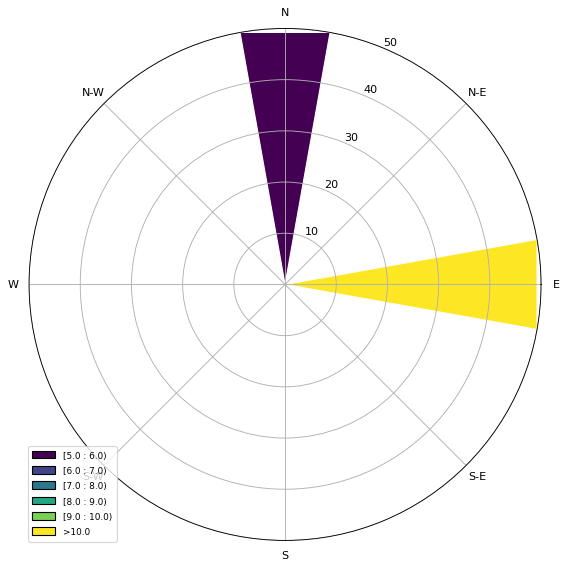

In [6]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W','S-W','S','S-E'])
ax.bar(wd,ws,normed=True,opening=0.9,edgecolor='white')
ax.set_legend();

### Entendendo a rosa dos ventos

Rosa dos ventos = Histograma em coordenadas polares

No exemplo acima mostra-se que:

- 50% dos ventos vem da direção norte (wd = 0)  (zero graus = norte)
- 50% dos ventos vem da direção leste (wd = 90) (noventa graus = leste)


In [7]:
ws2 = numpy.array([5,7,8,10]) # m/s
wd2 = numpy.array([270,180,180,180]) # ângulo em graus

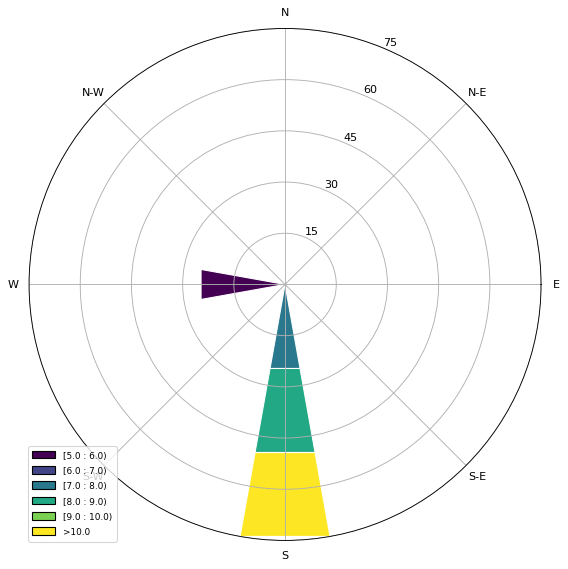

In [12]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W', 'S-W','S','S-E'])
ax.bar(wd2,ws2,normed=True,opening=0.9,edgecolor='white')
ax.set_legend();

### Geração de números pseudo-aleatórios entre [0.0, 1.0)

numpy.random.random(size=None)

Return random floats in the half-open interval [0.0, 1.0).

In [14]:
numpy.random.random(6)*10

array([4.18087553, 0.18784895, 0.44599713, 1.16115493, 1.86232317,
       2.96857883])

In [15]:
numpy.random.vonmises?

In [16]:
ws = numpy.random.vonmises(0,3.14,3000)*6
wd = numpy.random.vonmises(0,3.14,3000)*360

In [17]:
ws

array([-1.11480646,  4.10931126,  4.04368657, ..., -6.07214662,
        5.15368556, -2.75859782])

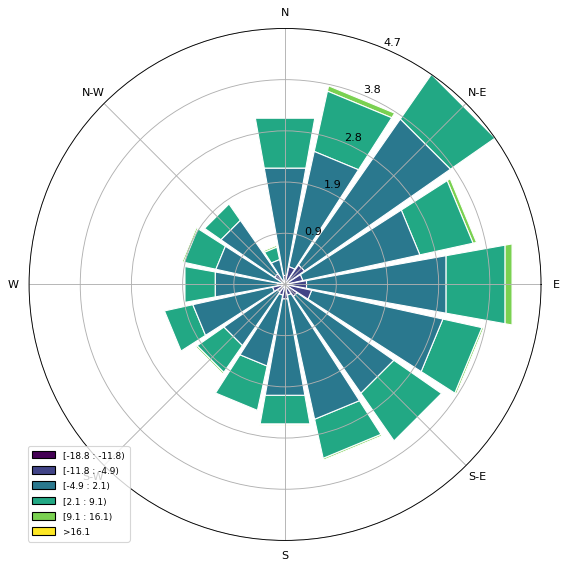

In [18]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W', 'S-W','S','S-E'])
ax.bar(wd,ws,normed=True,opening=0.9,edgecolor='white')
ax.set_legend();

In [19]:
URL = 'https://raw.githubusercontent.com/emiliomercuri/ciencia_dados/main/dados/est-met-casa-2018_12_07_pto%2Bvirg.csv'

In [20]:
dados = pandas.read_csv(URL,sep=';')
dados

,NO.,Time,Interval,Indoor Temperature(oC),Indoor Humidity(%),Outdoor Temperature(oC),Outdoor Humidity(%),Relative Pressure(hpa),Absolute Pressure(hpa),Wind Speed(m/s),Gust(m/s),Wind Direction,DewPoint(oC),WindChill(oC),Hour Rainfall(mm),24 Hour Rainfall(mm),Week Rainfall(mm),Month Rainfall(mm),Total Rainfall(mm)
0,1,22/11/2018 23:17:47,5,22.7,72,20.3,87,1009.6,905.6,4.1,5.8,SE,18.1,17.7,0.0,0.0,0.0,0.0,0.0
1,2,22/11/2018 23:22:47,5,22.6,73,20.3,87,1009.6,905.6,3.1,4.1,SE,18.1,18.5,0.0,0.0,0.0,0.0,0.0
2,3,22/11/2018 23:27:47,5,22.5,73,20.3,88,1009.6,905.6,2.7,5.1,E,18.3,18.9,0.0,0.0,0.0,0.0,0.0
3,4,22/11/2018 23:32:47,5,22.4,73,20.3,88,1009.7,905.7,1.4,2.4,E,18.3,20.3,0.0,0.0,0.0,0.0,0.0
4,5,22/11/2018 23:37:47,5,22.5,73,20.3,88,1009.8,905.8,2.4,3.7,N,18.3,19.2,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,4116,07/12/2018 06:48:47,5,20.2,68,16.0,91,1010.9,906.9,0.7,1.4,S,14.6,16.0,0.0,0.0,0.0,0.3,40.5
4116,4117,07/12/2018 06:53:47,5,20.2,68,16.1,90,1010.8,906.8,2.4,3.1,S,14.5,14.6,0.0,0.0,0.0,0.3,40.5
4117,4118,07/12/2018 06:58:47,5,20.2,67,15.8,91,1011.1,907.1,2.4,3.1,SE,14.4,14.3,0.0,0.0,0.0,0.3,40.5
4118,4119,07/12/2018 07:03:47,5,20.0,68,15.6,92,1011.0,907.0,2.4,2.7,S,14.3,14.1,0.0,0.0,0.0,0.3,40.5


In [21]:
ws = dados['Wind Speed(m/s)'].values

In [22]:
ws

array([4.1, 3.1, 2.7, ..., 2.4, 2.4, 0.7])

In [23]:
wd = dados['Wind Direction']

In [24]:
wd

0        SE
1        SE
2         E
3         E
4         N
       ... 
4115      S
4116      S
4117     SE
4118      S
4119     SE
Name: Wind Direction, Length: 4120, dtype: object

In [25]:
wd_graus = wd.copy()

In [26]:
wd_graus.unique()

array([' SE', ' E', ' N', ' ENE', ' NE', ' NNE', ' S', ' NNW', ' W',
       ' WSW', ' ESE', ' NW', ' WNW', ' SW', ' ---', ' SSW', ' SSE'],
      dtype=object)

In [28]:
wd_graus = wd_graus.replace({' N'  :  0})
wd_graus = wd_graus.replace({' NE':  45})
wd_graus = wd_graus.replace({' E'  : 90})
wd_graus = wd_graus.replace({' SE': 135})
wd_graus = wd_graus.replace({' S' : 180})
wd_graus = wd_graus.replace({' SW': 225})
wd_graus = wd_graus.replace({' W' : 270})
wd_graus = wd_graus.replace({' NW': 315})

wd_graus = wd_graus.replace({' ENE'  :  67.5})
wd_graus = wd_graus.replace({' NNE'  :  22.5})
wd_graus = wd_graus.replace({' NNW'  :  337.5})
wd_graus = wd_graus.replace({' WSW'  :  247.5})
wd_graus = wd_graus.replace({' ESE'  :  112.5})
wd_graus = wd_graus.replace({' WNW'  :  292.5})
wd_graus = wd_graus.replace({' SSW'  :  202.5})
wd_graus = wd_graus.replace({' SSE'  :  157.5})

wd_graus = wd_graus.replace({' ENE'  :  67.5})
wd_graus = wd_graus.replace({' NNE'  :  22.5})
wd_graus = wd_graus.replace({' NNW'  :  337.5})
wd_graus = wd_graus.replace({' WSW'  :  247.5})
wd_graus = wd_graus.replace({' ESE'  :  112.5})
wd_graus = wd_graus.replace({' WNW'  :  292.5})
wd_graus = wd_graus.replace({' SSW'  :  202.5})
wd_graus = wd_graus.replace({' SSE'  :  157.5})

In [29]:
wd_graus.unique()

array([135, 90, 0, 67.5, 45, 22.5, 180, 337.5, 270, 247.5, 112.5, 315,
       292.5, 225, ' ---', 202.5, 157.5], dtype=object)

In [30]:
wd_graus = wd_graus.replace({' ---' : numpy.nan})

In [31]:
wd_graus.unique()

array([135. ,  90. ,   0. ,  67.5,  45. ,  22.5, 180. , 337.5, 270. ,
       247.5, 112.5, 315. , 292.5, 225. ,   nan, 202.5, 157.5])

In [34]:
novo = pandas.DataFrame({'ws (m/s)' : ws, 'wd (graus)': wd_graus})
novo[0:3]

,ws (m/s),wd (graus)
0,4.1,135.0
1,3.1,135.0
2,2.7,90.0


In [36]:
novo.isna().sum()

ws (m/s)      0
wd (graus)    4
dtype: int64

In [37]:
novo2 = novo.dropna()

In [38]:
ws = novo2['ws (m/s)']
wd = novo2['wd (graus)']

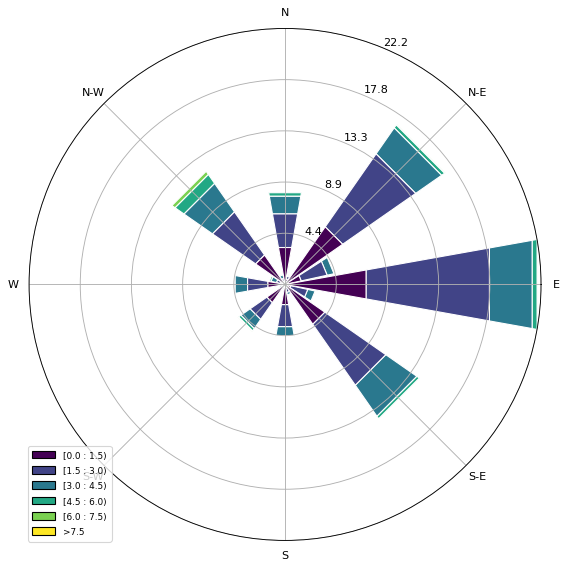

In [39]:
ax = WindroseAxes.from_ax(theta_labels=['E','N-E','N','N-W','W', 'S-W','S','S-E'])
ax.bar(wd,ws,normed=True,opening=0.9,edgecolor='white')
ax.set_legend();

#### Exercício: montar uma rosa dos ventos para o período diurno e outra para o período noturno

* No período dos dados, descobrir o horário do nascer e por do sol em Curitiba
* Separar o Dataframe
* Fazer as rosas dos ventos

## Temperatura do ponto de orvalho

Dewpoint Temperature

$T_{dp} \approx T-\frac{100-\text{RH}}{5}$

In [51]:
T = dados['Outdoor Temperature(oC)'].values
RH = dados['Outdoor Humidity(%)'].values
TPO_estacao = dados['DewPoint(oC)'].values

In [44]:
T

array([20.3, 20.3, 20.3, ..., 15.8, 15.6, 15.7])

In [41]:
RH

array([87, 87, 88, ..., 91, 92, 92])

In [45]:
TPO = T - (100-RH)/5

In [46]:
TPO

array([17.7, 17.7, 17.9, ..., 14. , 14. , 14.1])

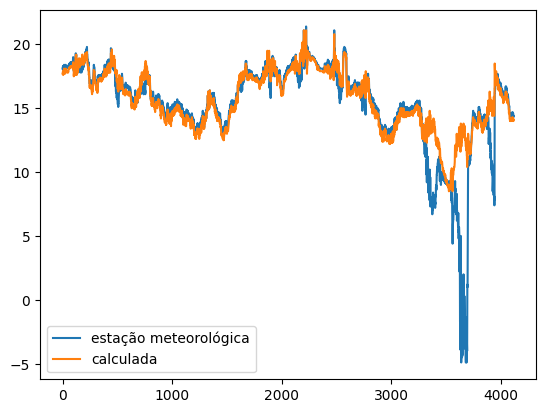

In [52]:
plt.plot(TPO_estacao,label='estação meteorológica')
plt.plot(TPO,label='calculada')
plt.legend();

### Temperatura do ponto de orvalho

1) Aproximação simples para a Dewpoint Temperature $T_{dp}$:

$T_{dp} \approx T-\frac{100-\text{RH}}{5}$

2) Magnus Formula


Uma aproximação bem conhecida usada para calcular o ponto de orvalho. Dada a temperatura do ar (do bulbo seco), $T$ (Celsius) e umidade relativa (em percentagem), RH:

$\displaystyle \gamma(T,RH) =\ln\left(\frac{RH}{100}\right)+\frac{bT}{c+T}$

$\displaystyle T_{dp} = \frac{c\gamma(T,RH)}{b-\gamma(T,RH)}$

Qual fórmula é mais acurada? (tem menor erro)

**Leituras adicionais (sugestão):**

* https://en.wikipedia.org/wiki/Dew_point
* [Artigo: The Relationship between Relative Humidity and the Dewpoint
Temperature in Moist Air ](https://www.dropbox.com/s/nifgmwjt1ycburm/bams-86-2-225.pdf?dl=1)

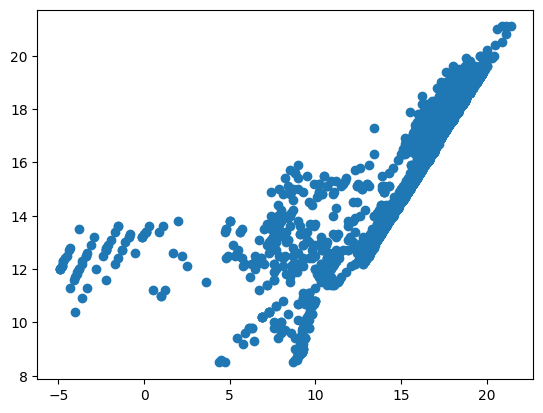

In [53]:
plt.scatter(TPO_estacao,TPO);

### Sensação térmica

1) Modelo original

$ \text{WCI}=\left(10\sqrt{v}-v+10.5\right) \cdot \left(33-T_\mathrm{a}\right)$

Sendo:
* $\text{WCI}$ = wind chill index (sensação térmica), kg*cal/m<sup>2</sup>/h
* $v$ =  velocidade do vento, m/s
* $T_\mathrm{a}$ = temperatura do ar, °C

2) North American and United Kingdom wind chill index

$T_\mathrm{wc}=13.12 + 0.6215 T_\mathrm{a}-11.37 v^{+0.16} + 0.3965 T_\mathrm{a} v^{+0.16}$

* https://en.wikipedia.org/wiki/Wind_chill
* https://doi.org/10.1175/BAMS-86-10-1453



In [54]:
T

array([20.3, 20.3, 20.3, ..., 15.8, 15.6, 15.7])

In [58]:
len(novo), len(novo2)

(4120, 4116)

In [59]:
len(T)

4120

In [60]:
len(ws)

4116

In [62]:
novo['T (oC)'] = T
novo[0:3]

,ws (m/s),wd (graus),T (oC)
0,4.1,135.0,20.3
1,3.1,135.0,20.3
2,2.7,90.0,20.3


In [63]:
novo3 = novo.dropna()

In [64]:
T = novo3['T (oC)'].values
ws = novo3['ws (m/s)'].values

In [66]:
T_WC_estacao = dados['WindChill(oC)'].values

In [65]:
T_WC= 13.12 + 0.6215*T -11.37 * ws**(0.16) + 0.3965 * T* ws**(0.16)

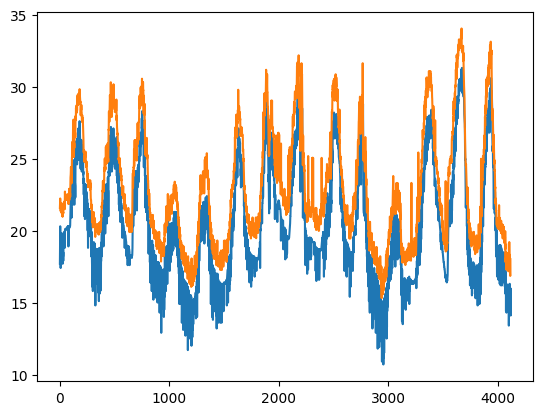

In [68]:
plt.plot(T_WC_estacao)
plt.plot(T_WC);

In [ ]:
import